# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [199]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn.preprocessing
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

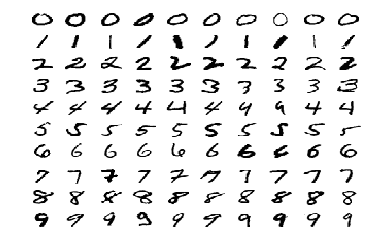

In [101]:
def P1(num_examples=10):

### STUDENT START ###

# Strategy: Walk through Y (mnist.target)
# exctract the digit, extract the corresponding feature list from X (mnist.data)
# put the extracted array of features into the 10*10 grid for display

# This array keeps track of the number of instances of a digit we have found while walking the target array #
    digCount = [0 for i in range(10)]
    
# We'll need a function to find if we got 10 instances of all digits
# The Function returns False if we found 10  instances of all digits

    def isSpace(ar, instance = 10):
        x = 0
        for i in range(len(ar)):
            x += ar[i]
        if x < (instance)**2:
            return True
        else:
            return False
        
# We'll need a function to find if we got 10 instances of a digit
# The Function returns False if we found 10  instances of a digits

    def isSpaceDigit(ar, d = 0, instance = 10):
        if ar[d] < instance:
            return True
        else: 
            return False
        
# print(digClount)

# Now we are walking the target array and creating plots of 10 instances of each digit
    
    for i in range(len(Y)):
        Xp = X[i].reshape(28,28)
        
        # Is there space for an instance of the digit Y[i]? 
        if isSpaceDigit(digCount, int(Y[i]), num_examples):
            # Yes, there is space, lets plot this digit
            # We'll put this digit in the "digit" row and collumn digCount
            plt.subplot(num_examples, num_examples, (Y[i] * num_examples) + 1 + digCount[int(Y[i])])
            plt.axis("off")
            plt.imshow(Xp, aspect = "auto", cmap = plt.cm.gray_r, interpolation = "nearest")
            digCount[int(Y[i])] +=1
        else:
            # Have we filled up all of the 10 * 10 array? 
            if not (isSpace(digCount, num_examples)):
                break
plt.show()

   
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [175]:
def P2(k_values):

### STUDENT START ###

# Walk through the list of K_values
    for i in k_values:
    
        # Create the knn model.
        knnModel = KNeighborsClassifier(i)
    
        # Fit the model on mini training set
        knnModel.fit(mini_train_data, mini_train_labels)

        # Try on the development set
        predictions = knnModel.predict(dev_data)
        
        # 2 metrics to get an idea of accuracy: Mean Squared Error and model score
        
        # Mean Squared error of the predictions
        meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
        sc = knnModel.score(dev_data, dev_labels)
        
        # Print the MSE and accuracy for a value of K
        print("The Mean Square Error for K = ", i, " on the dev data set is ", meanse)
        print("The accuracy is", (sc*100), "%")
        print()
        
        # if K = 1, also print the precision, recall and F1 report
        if i == 1:
            print("Classification Report")
            print()
            print(classification_report(dev_labels, predictions))
            print()
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

The Mean Square Error for K =  1  on the dev data set is  2.119
The accuracy is 88.8 %

Classification Report

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


The Mean Square Error for K =  3  on the dev data set is  2.128
The accuracy is 87.8 %

The Mean Square Error for K =  5  on the dev data set is  2.469
The accuracy is 86.9 %

The Mean Square Error for K =  7  on the dev data set is  2.357
The accur

ANSWER: "3" (precision of .77) seems to be the most difficult digit to predict

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [176]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    for tr in train_sizes:
        
        # Fit the model
        knnModel = KNeighborsClassifier(1)
        knnModel.fit(train_data[:tr], train_labels[:tr])

        # Try on the development set and time the operation
        sTime = time.time()
        predictions = knnModel.predict(dev_data)
        eTime = time.time()
        
        # Accuracy
        sc = knnModel.score(dev_data, dev_labels)
        accuracies.append(sc)
        
        # Print the MSE and accuracy for a value of K
        print()
        print("The Dev set accuracy for training data size:", tr, "is", (sc*100), "%")
        print("Time taken for the predictions is", eTime - sTime)
        print()
        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)
print()
print("Accuracy Matrix")
print(accuracies)


The Dev set accuracy for training data size: 100 is 72.0 %
Time taken for the predictions is 0.12468504905700684


The Dev set accuracy for training data size: 200 is 78.6 %
Time taken for the predictions is 0.23468804359436035


The Dev set accuracy for training data size: 400 is 84.1 %
Time taken for the predictions is 0.4730370044708252


The Dev set accuracy for training data size: 800 is 88.4 %
Time taken for the predictions is 0.951606035232544


The Dev set accuracy for training data size: 1600 is 90.2 %
Time taken for the predictions is 1.9812893867492676


The Dev set accuracy for training data size: 3200 is 92.6 %
Time taken for the predictions is 3.9774398803710938


The Dev set accuracy for training data size: 6400 is 93.7 %
Time taken for the predictions is 7.833939790725708


The Dev set accuracy for training data size: 12800 is 95.9 %
Time taken for the predictions is 15.428621053695679


The Dev set accuracy for training data size: 25000 is 97.0 %
Time taken for the pr

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [205]:
def P4():

### STUDENT START ###

    # Starting a linear regression #
    reg = LinearRegression()
    
    print("Train Sizes Array \n")
    print(train_sizes)
    print()
    
    # Reshaping train_sizes to a matrix #
    train_sizes_re = np.array(train_sizes).reshape(-1,1)
    print("Modified Train Sizes Array \n")
    print(train_sizes_re)
    print()
    
    # Fitting the model #
    print("The Model predicting accuracy from Training data size \n")
    reg.fit(train_sizes_re, accuracies)
    print('y = {0} * x + {1}'.format(reg.coef_[0], reg.intercept_))
    print()
    
    # Finding the prediction for training data size of 60000
    print("Accuracy with training data size of 60K \n", reg.predict(60000) * 100)
    
    # Scaling accuracies to get more reasonable predictions
    accuracies_re = np.copy(np.array(accuracies))
    mx = np.max(accuracies_re)
    mi = np.min(accuracies_re)
    
    # print(accuracies_re)
    
    for i in range(len(accuracies_re)):
        accuracies_re[i] = (accuracies_re[i]-mi)/(mx-mi)
        
    # print(accuracies_re)
    reg.fit(train_sizes_re, accuracies_re)
    
    pred = reg.predict(60000)
    
    # Normalizing the prediction like we did for accuracies
    # print(pred)
    print()
    print("Accuracy with training data size of 60K with normalized input \n", (pred-mi)/(pred-mi) * 100)
        
### STUDENT END ###

P4()

Train Sizes Array 

[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]

Modified Train Sizes Array 

[[  100]
 [  200]
 [  400]
 [  800]
 [ 1600]
 [ 3200]
 [ 6400]
 [12800]
 [25000]]

The Model predicting accuracy from Training data size 

y = 6.6652713854943685e-06 * x + 0.8431559772258371

Accuracy with training data size of 60K 
 [ 124.30722604]

Accuracy with training data size of 60K with normalized input 
 [ 100.]


ANSWER: The accuracy prediction (form the linear regression without any transforms) is 1.243 or 124. This is obviously not what we expected (We're expecting the accuracy to stay within the 100% bounds, i.e. the predictions to be in the range [0, 1])

Can we do a transform to make the predictions more reasonable? Yes, I think we can normalize "accuracies" used for training to get more reasonable predicdtions. The predication before normalization is 124%. After its close to 100% as that's the max of the accuracies

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion matrix:

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


The most confused digits with the predicted digit as title



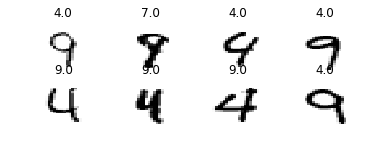

In [207]:
def P5():

### STUDENT START ###

    # Starting a 1-NN model #
    knnModel = KNeighborsClassifier(1)
    
    # Fitting with training data
    knnModel.fit(mini_train_data, mini_train_labels)

    # Try on the development set and time the operation
    predictions = knnModel.predict(dev_data)
        
    # Confusion matrix
    dig = [i for i in range(10)]
    sc = confusion_matrix(dev_labels, predictions, labels = dig)
    # Printing the matrix natively
    print("Confusion matrix:\n\n%s" % sc)
    print()
    
    # 4 & 9 seem to be the most confused digits #
    
    # printing 8 examples of 4 & 9 labeled as each other #
    count = 0
    print()
    print("The most confused digits with the predicted digit as title")
    print()
    
    # We'll walk through the all the labeled in dev_data #
    for i in range(len(dev_labels)):
        # We only care about those where labels do not match predictions #
        if dev_labels[i] != predictions[i] and (dev_labels[i] == 4 or dev_labels[i] == 9):
            devp = dev_data[i].reshape(28,28)
            count = count + 1
            if count > 8:
                break
            # plot this as an example #
            plt.subplot(4, 4, count)
            plt.axis("off")
            plt.title(predictions[i])
            plt.imshow(devp, aspect = "auto", cmap = plt.cm.gray_r, interpolation = "nearest")
    
### STUDENT END ###

P5()

    ANSWER: 4 & 9 Seems to be the most confused digits in the dev_data. The images above show why. 

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [ ]:
def P6():
    
### STUDENT START ###

    # Function to recalculate the value of a pixel from its 8 neighbors #
    # We'll take an image (One dimentional array) as the input and return one that's been blurred
    def gBlur(image, debug = False):
        
        # basic validation of the image. Is the array empty? #
        if (len(image) == 0):
            print("Error: We've got an array of lenght 0")
            return image
        
        # Print the input image for debugging #
        if debug:
            plt.subplot(1, 2, 1)
            plt.imshow(image)
        
        # Making an empty numpy array to hold the retun value
        newImage = np.empty((28, 28))
        
        # Now lets start walking through each pixel #
        for i in range(len(image)):
            for j in range(len(image[i])):
                
                # Now we have the pixel. Lets assume there's 8 around it #
                # For the edges the pixels will wrap around, i.e we'll have negative indices #
                
                # Extracting a sub array to do the sum
                subArray = image[i-1:i+2, j-1:j+2]
                bFactor = (np.sum(subArray))/9
                
                # Replace the pixel with the new value #
                newImage[i][j] = bFactor
                
        # print the output image for debugging #
        if debug:
            plt.subplot(1, 2, 2)
            plt.imshow(newImage)
        
        return newImage
    
    #gBlur(mini_train_data[0].reshape(28,28), debug = True)
    
    # Function to apply the blurring to an array of images
    def gBlurArray(imageArray, debug = False):
        
        # basic validation of the image. Is the array empty? #
        if (len(imageArray) == 0):
            print("Error: We've got an array of lenght 0")
            return imageArray
        
        # Creating an empty array for returning
        newArray = np.empty(imageArray.shape)
        
        # Walking through the input image array and applying blur on each image
        for i in range(len(imageArray)):
            newArray[i] = gBlur(imageArray[i].reshape(28,28), debug = False).reshape(28*28)
        
        if debug:
            # Print the before an after for one image from the array
            plt.subplot(1, 2, 1)
            plt.imshow(imageArray[300].reshape(28,28))
            
            plt.subplot(1, 2, 2)
            plt.imshow(newArray[300].reshape(28, 28))
            
        return newArray
            
    # gBlurArray(mini_train_data, True)
    
    # Function to run knn model with training and dev data
    def modKnn(train, trainLabels, dev, devLabels):
        
        # Create the knn model.
        knnModel = KNeighborsClassifier(1)
    
        # Fit the model on mini training set
        knnModel.fit(train, trainLabels)

        # Try on the development set
        predictions = knnModel.predict(dev)
        
        # 2 metrics to get an idea of accuracy: Mean Squared Error and model score
        
        # Mean Squared error and accuracy 
        meanse = (((predictions - devLabels) ** 2).sum()) / len(predictions)
        sc = knnModel.score(dev, devLabels)
        
        # Print the MSE and accuracy for a value of K
        print("The Mean Square Error for K = ", 1, " on the dev data set is ", meanse)
        print("The accuracy is", (sc*100), "%")
        
    # Knn model without any preprocessing on data
    modKnn(mini_train_data, mini_train_labels, dev_data, dev_labels)
    
    # Lets do the model with preprocessing on the training data
    modKnn(gBlurArray(mini_train_data), mini_train_labels, dev_data, dev_labels)
    
    # Trying the same with preprocessing on dev data
    modKnn(mini_train_data, mini_train_labels, gBlurArray(dev_data), dev_labels)
    
    # Trying with preprocessing on both training and dev data
    modKnn(gBlurArray(mini_train_data), mini_train_labels, gBlurArray(dev_data), dev_labels)

### STUDENT END ###

P6()

ANSWER: There difference in Mean Square Error and accuracy with varying level of preprocessing
We get the most accuracy and smalles MSE by preprocessing the training data 

NO preprocessing
The Mean Square Error for K =  1  on the dev data set is  2.119
The accuracy is 88.8 %

Preprocessing the training data
The Mean Square Error for K =  1  on the dev data set is  1.711
The accuracy is 90.9 %

Preprocessing dev data only
The Mean Square Error for K =  1  on the dev data set is  2.504
The accuracy is 87.1 %

Preprocessing both dev and training data
The Mean Square Error for K =  1  on the dev data set is  1.802
The accuracy is 90.3 %


(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [208]:
def P7():

### STUDENT START ###

    # Create the model
    BNbModel = BernoulliNB()
    
    # Fitting the model on the mini training set
    BNbModel.fit(mini_train_data, mini_train_labels)
    BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
    
    # Predictions on Dev data
    predictions = BNbModel.predict(dev_data)
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = BNbModel.score(dev_data, dev_labels)

    # Print the MSE and accuracy
    print()
    print("The Mean Square Error on the dev data set with Bernoulli NB is ", meanse)
    print("The accuracy is", (sc*100), "%")
    print()
    
    
    # Doing the same with MultinomialNB without any transforms
    
    # Create the model
    MNbModel = MultinomialNB()
    
    # Fitting the model on the mini training set
    MNbModel.fit(mini_train_data, mini_train_labels)
    MultinomialNB(alpha=1.0,class_prior=None, fit_prior=True)
    
    # Predictions on Dev data
    predictions = MNbModel.predict(dev_data)
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = MNbModel.score(dev_data, dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set with Multinomial NB is ", meanse)
    print("The accuracy is", (sc*100), "%")
    print()
    
    # Function to transform pixel values
    def tr(imageInput):
        image = np.copy(imageInput)
        for i in range(len(image)):
            if image[i] == 0:
                continue
            if image[i] < .75:
                image[i] = 1
                continue
            if image[i] > .75:
                image[i] = 2
        return image
    
    # Function to apply 0, 1, 2 transform to data array
    def trArray(imageInputArray):
        imageArray = np.copy(imageInputArray)
        for i in range(len(imageArray)):
            imageArray[i] = tr(imageInputArray[i])
        return imageArray
    
    # Repeating the Multinomial model
    # Create the model
    MNbModel1 = MultinomialNB()
    
    # Fitting the model on the mini training set
    MNbModel1.fit(trArray(mini_train_data), mini_train_labels)
    MultinomialNB(alpha=1.0,class_prior=None, fit_prior=True)
    
    # Predictions on Dev data
    predictions = MNbModel1.predict(trArray(dev_data))
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = MNbModel1.score(trArray(dev_data), dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set with Multinomial NB (features in a {0, 1, 2} set) is ", meanse)
    print("The accuracy is", (sc*100), "%")
            
### STUDENT END ###

P7()


The Mean Square Error on the dev data set with Bernoulli NB is  3.027
The accuracy is 81.5 %

The Mean Square Error on the dev data set with Multinomial NB is  3.382
The accuracy is 79.4 %

The Mean Square Error on the dev data set with Multinomial NB (features in a {0, 1, 2} set) is  3.255
The accuracy is 79.4 %


ANSWER: The multinomial function improves the results by just a little bit
The accuracy with binary and multinomial function is about the same ~79%
The Mean Square Error with Multiclass reduces from 3.382 to 3.255

The improvement is not dramatic due to he nature of the features. The binary transform already captures most of the difference among the features

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [57]:
def P8(alphas):

### STUDENT START ###

    #GridSearchCV to perform a search over values of alpha 
    #(the Laplace smoothing parameter) in a Bernoulli NB model.
    
    # Create the model
    BNbModel1 = BernoulliNB()
    
    # Setting the parameters under consideration
    pTune = [alphas]
    
    # Some test code
    # BNbModel1.fit(mini_train_data, mini_train_labels)
    # BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
    
    # Tuning alpha
    GS = GridSearchCV(BernoulliNB(binarize=0.0), pTune, cv=5)
    GS.fit(mini_train_data, mini_train_labels)
    
    # Some play and test code
    # means = GS.cv_results_['mean_test_score']
    # stds = GS.cv_results_['std_test_score']
    
    #for mean, std, params in zip(means, stds, GS.cv_results_['params']):
       # print("%0.3f (+/-%0.03f) for %r"
             # % (mean, std * 2, params)) 

    # actuals, predictions = dev_labels, GS.predict(dev_data)
    # print(classification_report(dev_labels, dev_data))
    # print()
    
    return GS
    
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# Replacing the array to remove some runtime warnings on processing of 0 and small values #
# Using the original though as the Q is about alpha = 0
# alphas = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklear

In [58]:
# Best parameter (alpha)

print("For best score ", nb.best_params_)
print()

# Finding scores for all values of alpha
means = nb.cv_results_['mean_test_score']
stds = nb.cv_results_['std_test_score']

print ("All scores\n")
    
for mean, std, params in zip(means, stds, nb.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params)) 

    # actuals, predictions = dev_labels, GS.predict(dev_data)
    # print(classification_report(dev_labels, dev_data))
    # print()

For best score  {'alpha': 0.0001}

All scores

0.810 (+/-0.034) for {'alpha': 0.0}
0.823 (+/-0.042) for {'alpha': 0.0001}
0.823 (+/-0.039) for {'alpha': 0.001}
0.819 (+/-0.044) for {'alpha': 0.01}
0.819 (+/-0.043) for {'alpha': 0.1}
0.817 (+/-0.045) for {'alpha': 0.5}
0.817 (+/-0.048) for {'alpha': 1.0}
0.812 (+/-0.047) for {'alpha': 2.0}
0.786 (+/-0.054) for {'alpha': 10.0}


ANSWER:

What is the best value for alpha? .0001

What is the accuracy when alpha=0? 81%

Is this what you'd expect? Yes, we'll expect smoothing to increase the accuracy by a small % as is visible from the results below

0.810 (+/-0.034) for {'alpha': 0.0}
0.823 (+/-0.042) for {'alpha': 0.0001}
0.823 (+/-0.039) for {'alpha': 0.001}
0.819 (+/-0.044) for {'alpha': 0.01}
0.819 (+/-0.043) for {'alpha': 0.1}
0.817 (+/-0.045) for {'alpha': 0.5}
0.817 (+/-0.048) for {'alpha': 1.0}
0.812 (+/-0.047) for {'alpha': 2.0}
0.786 (+/-0.054) for {'alpha': 10.0}




(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [147]:
def P9():

### STUDENT START ###

    # GaussianNB
    # Create the model
    GNbModel = GaussianNB()
    
    # Fitting the model on the mini training set
    GNbModel.fit(mini_train_data, mini_train_labels)
    GaussianNB(priors = None)
    
    # Predictions on Dev data
    predictions = GNbModel.predict(dev_data)
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = GNbModel.score(dev_data, dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set is ", meanse)
    print("The accuracy is", (sc*100), "%")
    
    # The accuracy on dev. data is ~62%. Trying to figure out what's going on
    
    # Checking the parameters
    print()
    print("Model parameters")
    print(GNbModel.get_params(deep = True))
    print()
    
    # Changing the feature values to increase accuracy
    
    # Binary feature values
    # Copy the training data
    miniTr1 = mini_train_data.copy()
    
    # Replace with 0 and 1
    miniTr1[miniTr1 < .5] = 0
    miniTr1[miniTr1 >= .5] = 1
    
    # Trying out the model
    
    GNbModel1 = GaussianNB()
    GNbModel1.fit(miniTr1, mini_train_labels)
    GaussianNB(priors = None)
    predictions = GNbModel1.predict(dev_data)
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = GNbModel1.score(dev_data, dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set ", meanse)
    print("The accuracy is", (sc*100), "%")
    print()
    
    # Trying to make the prediction with modified dev_data
    dev1 = dev_data.copy()
    dev1[dev1 < .5] = 0
    dev1[dev1 >= .5] = 1
    predictions = GNbModel1.predict(dev1)
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = GNbModel1.score(dev1, dev_labels)

    # Print the MSE and accuracy
    print()
    print("The Mean Square Error on the dev data set is ", meanse)
    print("The accuracy is", (sc*100), "%")

### STUDENT END ###

gnb = P9()

The Mean Square Error on the dev data set is  6.441
The accuracy is 62.1 %

Model parameters
{'priors': None}

The Mean Square Error on the dev data set  5.374
The accuracy is 62.8 %


The Mean Square Error on the dev data set is  5.998
The accuracy is 63.6 %


ANSWER: 

The Mean Square Error on the dev data set is  6.441
The accuracy is 62.1 %

The accuracy with Gaussian Naive Bayes is ~20% less than with Bernaulli 

The accuracy seems to increase by categorization (0,1) on both training and dev data, but not by much (~1% to 63.6%)



(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

The Mean Square Error on the dev data set is  3.027
The accuracy is 81.5 %

The shape of the probability estimates/class array
(10, 784)

The generated digits



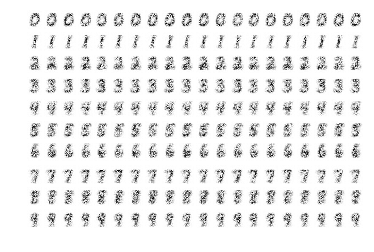

In [104]:
def P10(num_examples):

### STUDENT START ###
    # Training the NB Model and testing for accuracy
    
    # Create the model
    BNbModel = BernoulliNB()
    
    # Fitting the model on the mini training set
    BNbModel.fit(mini_train_data, mini_train_labels)
    BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
    
    # Predictions on Dev data
    predictions = BNbModel.predict(dev_data)
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = BNbModel.score(dev_data, dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set is ", meanse)
    print("The accuracy is", (sc*100), "%")
    
    # Reasonable accuracy, moving on to generating
    
    # Finding out the probability estimates for each class (digit)
    print()
    print("The shape of the probability estimates/class array")
    print(BNbModel.feature_log_prob_.shape)
    print()
    
    # We have a 10 (digits) * 784 matrix that's the probability of each pixel
    # print(np.exp(BNbModel.feature_log_prob_ ))
    
    # Making a 10*num_examples array. Each example is a 28*28 array
    print("The generated digits")
    print()
    digArray = np.empty((10,20,28,28))
    count = 0
    for i in range(len(digArray)):
        for j in range(len(digArray[i])):
            
            # generating just random values corresponding to a digit
            digArray[i][j] = np.random.rand(28,28)
            
            # Now we get the feature probability matrix corresponding to this digit
            # The product of the random array and feature probability is the digit
            digArray[i][j] = digArray[i][j] * (np.exp(BNbModel.feature_log_prob_ ))[i].reshape(28,28)
            
            # Plotting the digit
            count = count + 1
            plt.subplot(10, num_examples, count)
            plt.axis("off")
            plt.imshow(digArray[i][j], aspect = "auto", cmap = plt.cm.gray_r, interpolation = "nearest")
            
            # TODO Not urgent, but got to figure out how to make bigger matrix plots

### STUDENT END ###

P10(20)

ANSWER: The generated images can be recognized as such(digigs) but are blurry, especially at the edges. It the same kind of impact you get by blurring.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [93]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # Training a bernaulliNB model
    # Create the model
    BNbModel = BernoulliNB()
    
    # Fitting the model on the mini training set
    BNbModel.fit(mini_train_data, mini_train_labels)
    BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
    
    # Predictions on Dev data
    predictions = BNbModel.predict(dev_data)
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = BNbModel.score(dev_data, dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set is ", meanse)
    print("The accuracy is", (sc*100), "%")
    
    # Finding the probabilties for a class for each of the dev_data
    prob = BNbModel.predict_proba(dev_data)
    print()
    print("The shape of probability array for dev_data")
    print(prob.shape)
    print()

    for i in range(len(predictions)):
        for j in range(len(buckets)):
            if (buckets[j-1] < np.max(prob[i]) <= buckets[j]):
                total[j] = total[j] + 1
                if predictions[i] == dev_labels[i]:
                    correct[j] = correct[j] + 1
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

print("The probability accuracy matrix")
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): 
        accuracy = correct[i] / total[i]
        print ("p(pred) <= %.13f    total = %3d    accuracy = %.3f" %(buckets[i], total[i], accuracy))
               

The Mean Square Error on the dev data set is  3.027
The accuracy is 81.5 %

The shape of probability array for dev_data
(1000, 10)

The probability accuracy matrix
p(pred) <= 0.9000000000000    total =  28    accuracy = 0.536
p(pred) <= 0.9990000000000    total =  70    accuracy = 0.429
p(pred) <= 0.9999900000000    total =  59    accuracy = 0.508
p(pred) <= 0.9999999000000    total =  63    accuracy = 0.571
p(pred) <= 0.9999999990000    total =  57    accuracy = 0.632
p(pred) <= 0.9999999999900    total =  66    accuracy = 0.712
p(pred) <= 0.9999999999999    total =  56    accuracy = 0.857
p(pred) <= 1.0000000000000    total = 601    accuracy = 0.953


ANSWER: Above analysis of BernaulliNB shows the following:

1. At prediction probability of .9 the classifier is ~50% accurate
2. Except in the lowest 3 buckets, the accuracy is increasing with prediction probability
3. The accuracy is ~95% when the digit is almost an exact match

In the current form, our classifier is weakly calibrated. There is definately a positive correlation among probability and accuracy so we cannot conclude that the classifier is poorly calibrated

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [209]:
def P12():

### STUDENT START ###

# Training a BernoulliNB model

    # Create the model
    BNbModel = BernoulliNB()
    
    # Fitting the model on the mini training set
    BNbModel.fit(mini_train_data, mini_train_labels)
    BernoulliNB(alpha=.0001, binarize=0.0, class_prior=None, fit_prior=True)
    
    # Predictions on Dev data
    predictions = BNbModel.predict(dev_data)
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = BNbModel.score(dev_data, dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set of the base model is ", meanse)
    print("The accuracy of base model is", (sc*100), "%")
    print()
    
    #########################################################
    
    # Does the accuracy increase by training with more data #
    
    # Fitting the model on the mini training set
    BNbModel.fit(train_data, train_labels)
    BernoulliNB(alpha=.0001, binarize=0.0, class_prior=None, fit_prior=True)
    
    # Predictions on Dev data
    predictions = BNbModel.predict(dev_data)
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = BNbModel.score(dev_data, dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set of the base model with full training set is ", meanse)
    print("The accuracy of base model with full training set is", (sc*100), "%")
    print()
    
    #########################################################
    
    # Trying the multinomial model #
    
    # Create the model
    MNbModel1 = MultinomialNB()
    
    # Fitting the model on the mini training set
    MNbModel1.fit(train_data, train_labels)
    MultinomialNB(alpha=.0001,class_prior=None, fit_prior=True)
    
    # Predictions on Dev data
    predictions = MNbModel1.predict(dev_data)
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = MNbModel1.score(dev_data, dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set with a Multinomial model is ", meanse)
    print("The accuracy with multinomial model is", (sc*100), "%")
    print()
    
    #########################################################
    
    # Lets try to accentuate the features of the digit #
    # We'll highlight everything that has a little more information than 0#
    
    # Creating a new training set with middle of the image highlighted
    def tHighlight(data):
        hTrain = np.copy(data)
        hTrain[hTrain > .001] = hTrain[hTrain > .001] * 255
        return hTrain
        
    
    # Fitting the model on the mini training set
    MNbModel1.fit(tHighlight(train_data), train_labels)
    MultinomialNB(alpha=.0001,class_prior=None, fit_prior=True)
    
    # Predictions on Dev data
    predictions = MNbModel1.predict(tHighlight(dev_data))
    
    # Mean Squared error and accuracy
    meanse = (((predictions - dev_labels) ** 2).sum()) / len(predictions)
    sc = MNbModel1.score(tHighlight(dev_data), dev_labels)

    # Print the MSE and accuracy
    print("The Mean Square Error on the dev data set with a Multinomial model that accentuates information is ", meanse)
    print("The accuracy with multinomial model that accentuates information is", (sc*100), "%")
    print()
    
    
     #########################################################
    
    

### STUDENT END ###

P12()

The Mean Square Error on the dev data set of the base model is  3.027
The accuracy of base model is 81.5 %

The Mean Square Error on the dev data set of the base model with full training set is  2.717
The accuracy of base model with full training set is 82.6 %

The Mean Square Error on the dev data set with a Multinomial model is  2.719
The accuracy with multinomial model is 82.6 %

The Mean Square Error on the dev data set with a Multinomial model that accentuates information is  2.683
The accuracy with multinomial model that accentuates information is 82.7 %

